# Proyecto 1. ANÁLISIS ESTADÍSTICO
## Bioseñales y sistemas. 2024
### María J. Ostos, Cristian Florez, Juan A. Sañudo


## CONTEXTO
#### - Enfermedades Neurodegenerativas 
Enfermedad de Parkinson, Huntington y Esclerosis lateral amiotrófica. El diagnóstico temprano de las enfermedades mencionadas anteriormente es desafiante debido a la variabilidad y el solapamiento de sus síntomas iniciales, que a menudo son inespecíficos y pueden ser confundidos con otras afecciones menos graves. Además, la falta de biomarcadores definitivos y la evolución gradual de los síntomas dificultan la identificación temprana de estas enfermedades neurodegenerativas. La mejora en técnicas de imagen, pruebas genéticas y biomarcadores está en progreso, pero aún se necesita avanzar en la detección precoz para poder intervenir antes de que se produzca un daño significativo.


Enfermedad de Parkinson(EP) se presencia principalmente por temblores, sensación de extremidades inferiores rígidas, disminución de movimientos automáticos, alteración del equilibrio y la marcha, dolores musculares, depresión, ansiedad, estrés y demencia. 
Su diagnóstico es clínico y se confirma con un informe anatomopatológico, es decir las características de muestra de tejidos del paciente, se puede observar despigmentación de la sustancia nigra, y microscópicamente con la presencia de cuerpos de Lewy (proteína malformada y agregada, a-sinucleina).

Huntington: Es causada por la expansión de un secuencia repetitiva de ACG en el primer intrón del gen HTT (Huntingtina). Causa movimientos involuntarios, pérdida cognitiva y trastornos psiquiátricos. Se diagnostican mediante prueba molecular, funcional, psiquiátrica y conoscitivas y se apoya con estudio de neuroimagen ya que se observan las neuronas espinosas medianas del estriado.

Esclerosis lateral amiotrófica (ELA): Perdida rápida de motoneuronas superiores e inferiores, se presenta en  debilidad muscular, espasticidad, hiperreflexia, afecta principalmente la función respiratoria. La ELA se debe a mutaciones en el cromosoma 21 en el gen (SOD1), factores ambientales, fenómenos de autoinmunidad, extrés oxidativo, excitotoxicidad, entre otros. Su diagnóstico es mediante criterios de afecciones de las motoneuronas central o periférica en parte bulbar, cervical, torácica y lumbar; La evalución clínica contempla la capacidad de autocuidado y la función respiratoria del paciente. [1][2]

#### - Función Detrend de Scipy
detrend(data,'linear')
Eliminar la tendencia lineal a lo largo del eje de los datos.
El detrend implica modelar y eliminar la tendencia subyacente de la serie temporal para analizar las fluctuaciones alrededor de esta tendencia. [3] [4]


Serie Temporal y(t) = A + Bt + et
- Ajustar modelo de tendencia lineal: Por medio de regresión linear se estima A y B a partir de la serie temporal. y(t)' = A' + B't 
- Restar la tendencia y(t)-y(t)' 
- detrend = y(t) - (A' + B't) 

#### - Filtro Hampel
Es un filtro no lineal que se usa para encontrar valores atípicos permitiendo suavizar la señal, lo hace evaluando la mediana y la desviación estándar (mediante la desviación absoluta media) de los puntos cercanos, si el valor sobrepasa más de 3 desviaciones estándar, se sustituye por la mediana.

- DAM = mediana (|Xi - x'|)
- x' = mediana(Xi)

#### - Entropía de permutación
Es una herrmienta que permite analizar la complejidad y la estructura de las series temporales, es decir permite evaluar las permutaciones posibles de los valores y contar con que frecuencia ocurren. La entropía de permutación se calcula a partir de las frecuencias de las permutaciones y mide la aleatoriedad en la serie temporal [6].  INSERTAR FORMULA

En bioingeniería, proporciona una forma de evaluar la variabilidad y la regularidad en señales biológicas, ofreciendo información valiosa sobre la salud y el funcionamiento de sistemas biológicos complejos.

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.io as sio;
from scipy.fftpack import fft, ifft;
import os
import pandas as pd
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from scipy.signal import detrend

In [44]:
def hampelfilter(wk, K, FilterParms):
    """
    Procedure to implement the Hampel filter
    """
    #
    Thresh = FilterParms[0]
    ctr = wk#[K]
    ref = np.median(wk)

    AbsDev = abs(wk - ref)
    MAD = 1.4826 * np.median(AbsDev)
    TestVal = abs(ctr - ref)
    #if TestVal > Thresh * MAD:
    yk = ctr

    print("changing");
    numero = np.sum((TestVal > Thresh * MAD)==True)
    print(numero)

    yk[TestVal > Thresh * MAD] = ref


    return yk

In [9]:
directorio_actual=os.getcwd()
archivos_control=os.listdir(directorio_actual +'./Data/Control/ts')
sujetoi=(directorio_actual +'./Data/Control/ts'+ "/" + "control1.ts");

In [12]:
names= ['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 'Left Swing Interval (sec)',
'Right Swing Interval (sec)',	'Left Swing Interval (% of stride)', 'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)', 'Left Stance Interval (% of stride)',
'Right Stance Interval (% of stride)', 'Double Support Interval (sec)',	'Double Support Interval (% of stride)']
datos = pd.read_csv(sujetoi,delimiter='\t',names=names)

In [60]:
datos

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,21.9300,1.0667,1.0600,0.3633,0.3833,34.06,36.16,0.7033,0.6767,65.94,63.84,0.3200,30.00
1,23.0167,1.0867,1.0733,0.3833,0.3967,35.28,36.96,0.7033,0.6767,64.72,63.04,0.3067,28.22
2,24.0633,1.0467,1.0733,0.3633,0.3900,34.71,36.34,0.6833,0.6833,65.29,63.66,0.2933,28.03
3,25.1133,1.0500,1.0400,0.3733,0.3533,35.56,33.97,0.6767,0.6867,64.44,66.03,0.3233,30.79
4,26.1300,1.0167,1.0400,0.3567,0.3833,35.08,36.86,0.6600,0.6567,64.92,63.14,0.2767,27.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,294.3967,1.1000,1.1000,0.3500,0.3700,31.82,33.64,0.7500,0.7300,68.18,66.36,0.3800,34.55
255,295.4767,1.0800,1.0667,0.3700,0.3367,34.26,31.56,0.7100,0.7300,65.74,68.44,0.3733,34.57
256,296.5133,1.0367,1.0900,0.3267,0.3933,31.51,36.09,0.7100,0.6967,68.49,63.91,0.3167,30.55
257,297.5600,1.0467,1.0367,0.3433,0.3500,32.80,33.76,0.7033,0.6867,67.20,66.24,0.3533,33.76


In [28]:
time=datos["Elapsed Time (sec)"]
LSI=detrend(datos['Left Stride Interval (sec)'])
RSI=detrend(datos['Right Stride Interval (sec)'])
LWI=detrend(datos['Left Swing Interval (sec)'])
RWI=detrend(datos['Right Swing Interval (sec)'])

In [37]:
df=datos[["Elapsed Time (sec)",'Left Stride Interval (sec)','Right Stride Interval (sec)','Left Swing Interval (sec)','Right Swing Interval (sec)']]

In [39]:
datos1=[time,LSI,RSI,LWI,RWI]

In [54]:
datos2=[time,hampelfilter(datos1[1],3,[6]),hampelfilter(datos1[2],3,[6]),hampelfilter(datos1[3],3,[6]),hampelfilter(datos1[4],3,[6])]

changing
0
changing
1
changing
0
changing
0


In [42]:
datos2

[0       21.9300
 1       23.0167
 2       24.0633
 3       25.1133
 4       26.1300
          ...   
 254    294.3967
 255    295.4767
 256    296.5133
 257    297.5600
 258    298.6000
 Name: Elapsed Time (sec), Length: 259, dtype: float64,
 array([ 8.00049599e-03,  2.78947515e-02, -1.22109929e-02, -9.01673742e-03,
        -4.24224819e-02, -3.92282264e-02, -2.63397082e-03,  3.86028471e-03,
        -2.28454598e-02, -1.29512042e-02, -3.05694870e-03, -3.31626932e-02,
         3.33156236e-03, -7.00741821e-02, -1.68799266e-02, -3.69856710e-02,
        -7.09141552e-03, -4.97159986e-04,  2.69709554e-03,  2.25913511e-02,
         1.24856066e-02, -9.20137863e-04, -9.77258823e-02,  4.21683732e-02,
        -2.45373713e-02, -1.46431157e-02, -2.47488602e-02, -3.15546047e-02,
         5.03965085e-03,  1.49339064e-02, -1.18718381e-02, -3.86775826e-02,
        -2.20833270e-02, -4.54890715e-02, -5.89948160e-02,  1.42994396e-02,
        -1.92063049e-02, -3.59120494e-02, -3.60177938e-02,  3.71764617e-0

In [43]:
datos1

[0       21.9300
 1       23.0167
 2       24.0633
 3       25.1133
 4       26.1300
          ...   
 254    294.3967
 255    295.4767
 256    296.5133
 257    297.5600
 258    298.6000
 Name: Elapsed Time (sec), Length: 259, dtype: float64,
 array([ 8.00049599e-03,  2.78947515e-02, -1.22109929e-02, -9.01673742e-03,
        -4.24224819e-02, -3.92282264e-02, -2.63397082e-03,  3.86028471e-03,
        -2.28454598e-02, -1.29512042e-02, -3.05694870e-03, -3.31626932e-02,
         3.33156236e-03, -7.00741821e-02, -1.68799266e-02, -3.69856710e-02,
        -7.09141552e-03, -4.97159986e-04,  2.69709554e-03,  2.25913511e-02,
         1.24856066e-02, -9.20137863e-04, -9.77258823e-02,  4.21683732e-02,
        -2.45373713e-02, -1.46431157e-02, -2.47488602e-02, -3.15546047e-02,
         5.03965085e-03,  1.49339064e-02, -1.18718381e-02, -3.86775826e-02,
        -2.20833270e-02, -4.54890715e-02, -5.89948160e-02,  1.42994396e-02,
        -1.92063049e-02, -3.59120494e-02, -3.60177938e-02,  3.71764617e-0

In [25]:
datos2

array([[ 9.47658940e-01,  9.59207527e-01,  9.30656113e-01, ...,
         2.92197168e-01,  2.63745755e-01,  2.28594342e-01],
       [ 8.00049599e-03,  2.78947515e-02, -1.22109929e-02, ...,
        -4.90700881e-02, -3.91758326e-02, -4.59815771e-02],
       [ 1.61776359e-03,  1.48092544e-02,  1.47007452e-02, ...,
         3.83940925e-03, -4.95691000e-02, -3.96776091e-02],
       [ 1.04924770e-02,  3.05365747e-02,  1.05806724e-02, ...,
        -1.48185102e-02,  1.82558747e-03, -2.47303148e-02],
       [ 8.41834868e-03,  2.17695069e-02,  1.50206651e-02, ...,
         5.91485609e-03, -3.74339857e-02, -7.82827443e-04]])

In [27]:

# Calcula la media
media = np.mean(datos2[1])

# Calcula la desviación estándar
desviacion_estandar = np.std(datos2[1])

# Calcula el coeficiente de variación
coeficiente_variacion = (desviacion_estandar / media) * 100

print(f"Media: {media}")
print(f"Desviación Estándar: {desviacion_estandar}")
print(f"Coeficiente de Variación: {coeficiente_variacion:.2f}%")

Media: -0.0012550340272950067
Desviación Estándar: 0.03471611667324873
Coeficiente de Variación: -2766.15%


In [17]:
time

0       21.9300
1       23.0167
2       24.0633
3       25.1133
4       26.1300
         ...   
254    294.3967
255    295.4767
256    296.5133
257    297.5600
258    298.6000
Name: Elapsed Time (sec), Length: 259, dtype: float64

In [5]:
base_path = "./Data/"

# Lista de las carpetas que contienen los subdirectorios
folders = ['Control', 'Esclerosis_Lateral_Amiotrófica', 'Huntington', 'Parkinson']

names= ['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 'Left Swing Interval (sec)',
'Right Swing Interval (sec)',	'Left Swing Interval (% of stride)', 'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)', 'Left Stance Interval (% of stride)',
'Right Stance Interval (% of stride)', 'Double Support Interval (sec)',	'Double Support Interval (% of stride)']
directorio_actual=os.getcwd() #Se obtiene la ruta actual del archivo
# datos = pd.read_csv(directorio_actual +'./Data/Control/ts',delimiter='\t',names=names)
# datos = pd.read_csv("./Data/Control/ts",delimiter='\t',names=names)
datos = pd.read_csv(base_path+folders[1]+"ts"+"/"+"als1.ts",delimiter='\t',names=names)


FileNotFoundError: [Errno 2] No such file or directory: './Data/Esclerosis_Lateral_Amiotróficats/als1.ts'

In [3]:
datos

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,22.3200,1.2833,1.3533,0.4067,0.4133,31.69,30.54,0.8767,0.9400,68.31,69.46,0.4633,36.10
1,23.6433,1.3233,1.2667,0.4833,0.4000,36.52,31.58,0.8400,0.8667,63.48,68.42,0.4400,33.25
2,24.9467,1.3033,1.3600,0.4500,0.4267,34.53,31.37,0.8533,0.9333,65.47,68.63,0.4267,32.74
3,26.3633,1.4167,1.2833,0.5033,0.3667,35.53,28.57,0.9133,0.9167,64.47,71.43,0.5467,38.59
4,27.6000,1.2367,1.4067,0.3467,0.3567,28.03,25.36,0.8900,1.0500,71.97,74.64,0.5333,43.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,267.6833,1.3533,1.3200,0.4567,0.3867,33.74,29.29,0.8967,0.9333,66.26,70.71,0.5100,37.68
190,269.0167,1.3333,1.3967,0.4167,0.3833,31.25,27.45,0.9167,1.0133,68.75,72.55,0.5333,40.00
191,270.3000,1.2833,1.3133,0.3733,0.3800,29.09,28.93,0.9100,0.9333,70.91,71.07,0.5300,41.30
192,271.5767,1.2767,1.2867,0.3567,0.3800,27.94,29.53,0.9200,0.9067,72.06,70.47,0.5400,42.30


In [3]:
base_path = "./Data/"

# Lista de las carpetas que contienen los subdirectorios
folders = ['Control', 'Esclerosis_Lateral_Amiotrófica', 'Huntington', 'Parkinson']
# Crear un DataFrame vacío para almacenar los datos
df = pd.DataFrame()

# Función para recorrer las carpetas y leer los archivos .ts
def load_ts_files_to_dataframe(base_path, folders):
    data_list = []  # Lista para almacenar los datos temporales
    for folder in folders:
        ts_folder = os.path.join(base_path, folder, 'ts')
        if os.path.exists(ts_folder):
            for file_name in os.listdir(ts_folder):
                if file_name.endswith('.ts'):
                    file_path = os.path.join(ts_folder, file_name)
                    # Leer el archivo .ts y guardarlo en un DataFrame temporal
                    temp_df = pd.read_csv(file_path, delimiter='\t')  # Ajustar el delimitador si es necesario
                    temp_df['source_folder'] = folder  # Añadir la carpeta de origen al DataFrame
                    data_list.append(temp_df)
    
    # Concatenar todos los DataFrames en uno solo
    if data_list:
        return pd.concat(data_list, ignore_index=True)
    else:
        print("No se encontraron archivos .ts")
        return pd.DataFrame()

# Ejecutar la función y guardar los datos en el DataFrame
df = load_ts_files_to_dataframe(base_path, folders)

# Mostrar el DataFrame resultante
print(df)

       21.9300  1.0667  1.0600  0.3633  0.3833  34.06  36.16  0.7033  0.6767  \
0      23.0167  1.0867  1.0733  0.3833  0.3967  35.28  36.96  0.7033  0.6767   
1      24.0633  1.0467  1.0733  0.3633  0.3900  34.71  36.34  0.6833  0.6833   
2      25.1133  1.0500  1.0400  0.3733  0.3533  35.56  33.97  0.6767  0.6867   
3      26.1300  1.0167  1.0400  0.3567  0.3833  35.08  36.86  0.6600  0.6567   
4      27.1500  1.0200  1.0200  0.3367  0.3333  33.01  32.68  0.6833  0.6867   
...        ...     ...     ...     ...     ...    ...    ...     ...     ...   
15091      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
15092      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
15093      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
15094      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   
15095      NaN     NaN     NaN     NaN     NaN    NaN    NaN     NaN     NaN   

       65.94  ...  36.41   22.4633  0.4

In [4]:
df

,21.9300,1.0667,1.0600,0.3633,0.3833,34.06,36.16,0.7033,0.6767,65.94,...,36.41,22.4633,0.4900,0.4833,37.12,37.76,0.7967,62.88,62.24,26.26
0,23.0167,1.0867,1.0733,0.3833,0.3967,35.28,36.96,0.7033,0.6767,64.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24.0633,1.0467,1.0733,0.3633,0.3900,34.71,36.34,0.6833,0.6833,65.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.1133,1.0500,1.0400,0.3733,0.3533,35.56,33.97,0.6767,0.6867,64.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26.1300,1.0167,1.0400,0.3567,0.3833,35.08,36.86,0.6600,0.6567,64.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27.1500,1.0200,1.0200,0.3367,0.3333,33.01,32.68,0.6833,0.6867,66.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,294.2700,0.4600,0.4500,36.90,36.29,0.7900,63.10,63.71,27.01
15092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,295.4800,0.4533,0.4300,37.47,35.05,0.7967,62.53,64.95,27.00
15093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,296.6933,0.4533,0.4333,37.36,35.91,0.7733,62.64,64.09,26.92
15094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,297.9233,0.4600,0.4333,37.40,35.42,0.7900,62.60,64.58,27.37


In [2]:
import os

# Ruta principal donde se encuentra la carpeta "Data"
# base_path = "ruta/a/la/carpeta/Data"
base_path = "./Data/"

# Lista de las carpetas que contienen los subdirectorios
folders = ['Control', 'Esclerosis_Lateral_Amiotrófica', 'Huntington', 'Parkinson']

# Función para recorrer las carpetas y leer los archivos .ts
def read_ts_files(base_path, folders):
    for folder in folders:
        ts_folder = os.path.join(base_path, folder, 'ts')
        if os.path.exists(ts_folder):
            for file_name in os.listdir(ts_folder):
                if file_name.endswith('.ts'):
                    file_path = os.path.join(ts_folder, file_name)
                    # Aquí puedes definir cómo leer el archivo. Si es texto:
                    with open(file_path, 'r') as f:
                        content = f.read()
                        print(f"Contenido de {file_name}:")
                        print(content)
        else:
            print(f"No se encontró la carpeta {ts_folder}")

# Ejecutar la función
read_ts_files(base_path, folders)

Contenido de control1.ts:
21.9300	1.0667	1.0600	0.3633	0.3833	34.06	36.16	0.7033	0.6767	65.94	63.84	0.3200	30.00
23.0167	1.0867	1.0733	0.3833	0.3967	35.28	36.96	0.7033	0.6767	64.72	63.04	0.3067	28.22
24.0633	1.0467	1.0733	0.3633	0.3900	34.71	36.34	0.6833	0.6833	65.29	63.66	0.2933	28.03
25.1133	1.0500	1.0400	0.3733	0.3533	35.56	33.97	0.6767	0.6867	64.44	66.03	0.3233	30.79
26.1300	1.0167	1.0400	0.3567	0.3833	35.08	36.86	0.6600	0.6567	64.92	63.14	0.2767	27.21
27.1500	1.0200	1.0200	0.3367	0.3333	33.01	32.68	0.6833	0.6867	66.99	67.32	0.3500	34.31
28.2067	1.0567	1.0433	0.3533	0.3733	33.44	35.78	0.7033	0.6700	66.56	64.22	0.3300	31.23
29.2700	1.0633	1.0567	0.3667	0.3900	34.48	36.91	0.6967	0.6667	65.52	63.09	0.3067	28.84
30.3067	1.0367	1.0433	0.3667	0.3933	35.37	37.70	0.6700	0.6500	64.63	62.30	0.2767	26.69
31.3533	1.0467	1.0300	0.3733	0.3367	35.67	32.69	0.6733	0.6933	64.33	67.31	0.3367	32.17
32.4100	1.0567	1.0600	0.3700	0.3800	35.02	35.85	0.6867	0.6800	64.98	64.15	0.3067	29.02
33.4367	1.0267	1.

In [ ]:
#Cargar datos control
directorio_actual=os.getcwd() #Se obtiene la ruta actual del archivo
# fs = 1000;
# num_canales = 8 #Channels = 'C3' 'C1' 'CZ' 'C2' 'C4' 'O1' 'OZ' 'O2'

#listando los archivos de control en el directorio
archivos_control=os.listdir(directorio_actual +'./assets/Proyecto_1/Data/Control/ts') #Se obtiene la ruta de las señales de control
control=[]
data = sio.loadmat(archivos_control[1]);
#CARGAMOS LOS CONTROLES
# for i in range(0,len(archivos_control)):
#     #ruta de cada archivo
#     sujetoi=(directorio_actual +'./assets/Practica_3/'+'control'+ "/" + archivos_control[i]);
#     #1 CARGAR EL ARCHIVO
#     data = sio.loadmat(sujetoi);
#     data = data["data"];

#     #2 VOLVERLO CONTINUO
#     sensores = data.shape[0];
#     puntos = data.shape[1];
#     epocas = data.shape[2];

#     senal_continua_control = np.reshape(data,(sensores, puntos*epocas), order = 'F');
#     control.append(data)
    
#

In [5]:
archivos_control

['control1.ts',
 'control10.ts',
 'control11.ts',
 'control12.ts',
 'control13.ts',
 'control14.ts',
 'control15.ts',
 'control16.ts',
 'control2.ts',
 'control3.ts',
 'control4.ts',
 'control5.ts',
 'control6.ts',
 'control7.ts',
 'control8.ts',
 'control9.ts']

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

names= ['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 'Left Swing Interval (sec)',
'Right Swing Interval (sec)',	'Left Swing Interval (% of stride)', 'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)', 'Left Stance Interval (% of stride)',
'Right Stance Interval (% of stride)', 'Double Support Interval (sec)',	'Double Support Interval (% of stride)']
directorio_actual=os.getcwd() #Se obtiene la ruta actual del archivo
datos = pd.read_csv(directorio_actual +'./Data/Control/ts',delimiter='\t',names=names)
# datos = pd.read_csv("./Data/Control/ts",delimiter='\t',names=names)



PermissionError: [Errno 13] Permission denied: 'c:\\Users\\crist\\OneDrive\\Desktop\\2024-2\\Bioseñales\\LabBiosenales\\Proyecto_1./Data/Control/ts'

In [9]:
import os 
ruta=os.getcwd()
archivo=os.listdir(ruta+'/Data/Control/ts')
serie1=[] #guardar en matriz tridimensional? para no tener dos series por aparte
serie2=[]
for i in archivo[0:-1]: #ignora el readme
    v=os.listdir(ruta+'/Data/Control/ts'+'/'+i)
    x1=np.loadtxt(ruta+'/Data/Control/ts'+'/'+i+'/'+v[0],skiprows=1,delimiter='\t',usecols=range(0,9))
    x2=np.loadtxt(ruta+'/Data/Control/ts'+'/'+i+'/'+v[1],skiprows=1,delimiter='\t',usecols=range(0,9))
    serie1.append(x1)
    serie2.append(x2)
serie1=np.array(serie1,dtype=object)

NotADirectoryError: [WinError 267] El nombre del directorio no es válido: 'c:\\Users\\crist\\OneDrive\\Desktop\\2024-2\\Bioseñales\\LabBiosenales\\Proyecto_1/Data/Control/ts/control1.ts'

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

names= ['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 'Left Swing Interval (sec)',
'Right Swing Interval (sec)',	'Left Swing Interval (% of stride)', 'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)', 'Left Stance Interval (% of stride)',
'Right Stance Interval (% of stride)', 'Double Support Interval (sec)',	'Double Support Interval (% of stride)']

# datos = pd.read_csv('Proyecto_1\Data\Esclerosis_Lateral_Amiotrófica\ts\als2.ts',delimiter='\t',names=names)
datos = pd.read_csv('ts/als2.ts',delimiter='\t',names=names)


In [32]:
datos

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,21.9567,1.1700,1.1467,0.3933,0.4033,33.62,35.17,0.7767,0.7433,66.38,64.83,0.3733,31.91
1,23.1400,1.1833,1.1933,0.4133,0.4233,34.93,35.47,0.7700,0.7700,65.07,64.53,0.3467,29.30
2,24.2633,1.1233,1.1567,0.4000,0.4233,35.61,36.60,0.7233,0.7333,64.39,63.40,0.3000,26.71
3,25.3800,1.1167,1.1067,0.3933,0.4100,35.22,37.05,0.7233,0.6967,64.78,62.95,0.3133,28.06
4,26.5000,1.1200,1.1400,0.3767,0.3867,33.63,33.92,0.7433,0.7533,66.37,66.08,0.3567,31.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,294.2567,1.1467,1.1733,0.3767,0.4100,32.85,34.94,0.7700,0.7633,67.15,65.06,0.3600,31.40
238,295.4233,1.1667,1.1400,0.3900,0.3833,33.43,33.63,0.7767,0.7567,66.57,66.37,0.3933,33.71
239,296.5633,1.1400,1.1567,0.3867,0.3900,33.92,33.72,0.7533,0.7667,66.08,66.28,0.3633,31.87
240,297.7100,1.1467,1.1467,0.3833,0.3867,33.43,33.72,0.7633,0.7600,66.57,66.28,0.3767,32.85


In [22]:
from scipy.signal import detrend

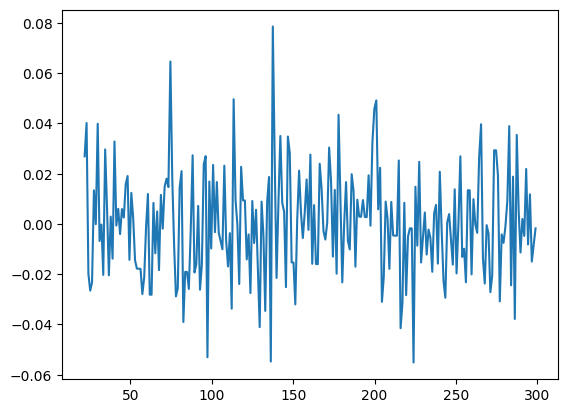

In [33]:
from scipy.signal import detrend
tiempo = datos['Elapsed Time (sec)'].values
lsi = datos['Left Stride Interval (sec)'].values
type(lsi)

#plt.plot(tiempo,lsi)
plt.plot(tiempo,signal.detrend(lsi))

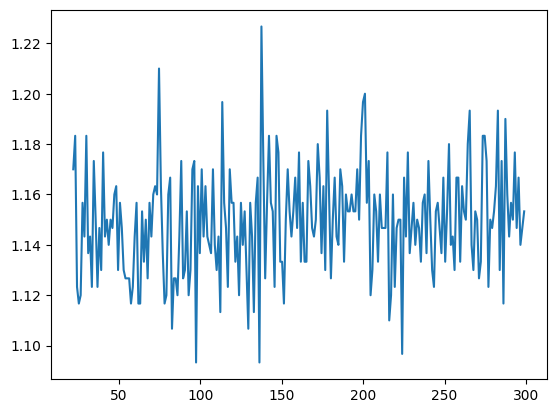

In [34]:

plt.plot(tiempo,lsi)


## BIBLIOGRAFÍA
[1]Sánchez Ochoa, Geanny, Cuello Almarales, Dany, & Almaguer Mederos, Luis E.. (2020). Acortamiento de telómeros en enfermedades neurodegenerativas: implicaciones terapéuticas. Revista Habanera de Ciencias Médicas, 19(5), . Epub 10 de noviembre de 2020. Recuperado en 09 de septiembre de 2024, de http://scielo.sld.cu/scielo.php?script=sci_arttext&pid=S1729-519X2020000600005&lng=es&tlng=pt.

[2]Martínez-Lazcano, J. C., Boll-Woehrlen, M. C., Hernández-Melesio, M. A., Rubio-Osornio, M., Sánchez-Mendoza, M. A., & Ríos, C. (2010). Radicales libres y estrés oxidativo en las enfermedades neurodegenerativas. Mensaje Bioquim, 34, 43-59. https://www.researchgate.net/profile/Francisca-Perez-Severiano/publication/265886313_Radicales_libres_y_estres_oxidativo_en_las_enfermedades_neurodegenerativas/links/54b6a77e0cf2bd04be324558/Radicales-libres-y-estres-oxidativo-en-las-enfermedades-neurodegenerativas.pdf

[3] Scipy Manual. detrend.  https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html

[4] Mario Filho (2023). Detrending time series data with Python. https://forecastegy.com/posts/detrending-time-series-data-python/

[5] MathWorks. Hampel. https://la.mathworks.com/help/signal/ref/hampel.html

[6] Henry Miguel (2020). Entropía de permutación. https://www.aptech.com/blog/permutation-entropy/
